# Die [Titanic challenge](https://www.kaggle.com/c/titanic)

Die Titanic challenge ist eine Herausforderung von aus www.kaggle.com. 

Die untenstehende Lösung orientiert sich stark an der [Beschreibung von Raman Sah](https://towardsdatascience.com/how-i-got-a-score-of-82-3-and-ended-up-being-in-top-4-of-kaggles-titanic-dataset-bb2875cee6b5).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set()

%matplotlib inline

data = pd.read_csv('data/train.csv')

Let's see how the data looks like

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We don't need PassengerId as an input to the model.
And have a quick look at data stats

In [3]:
data.drop('PassengerId', axis=1, inplace=True)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check if the gender plays a role in survival

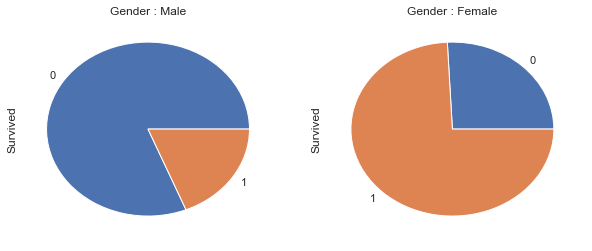

In [4]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
plt.title('Gender : Male')
data.Survived[data['Sex'] == 'male'].value_counts().sort_index().plot(kind='pie')
fig.add_subplot(122)
plt.title('Gender : Female')
data.Survived[data['Sex'] == 'female'].value_counts().sort_index().plot(kind='pie')

In [5]:
from sklearn.preprocessing import LabelEncoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Sex']], data['Survived'], test_size=0.2, random_state=42)

decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
score = decision_tree_clf.score(X_test, y_test)
print(score.round(2))

0.78
